In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(r'D:\Study\AIO\Exercises\Heart Disease\data\cleveland.csv', names =  columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [48]:
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


# Plot the correlation between Age and Probability of Heart Disease (Target)

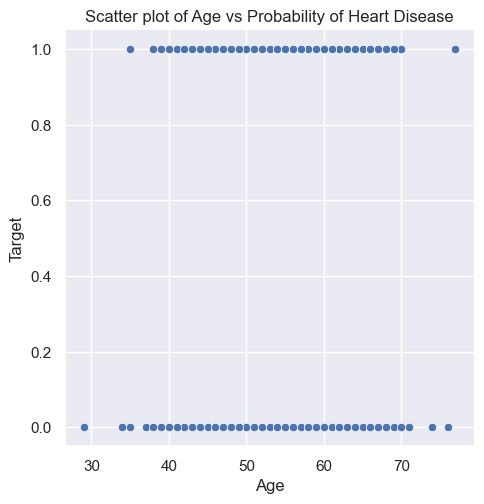

In [50]:
sns.relplot(x="age", y="target", data=df)
sns.set_theme()

plt.title("Scatter plot of Age vs Probability of Heart Disease")
plt.xlabel("Age")
plt.ylabel("Target")

plt.show()

Text(0, 0.5, 'Target')

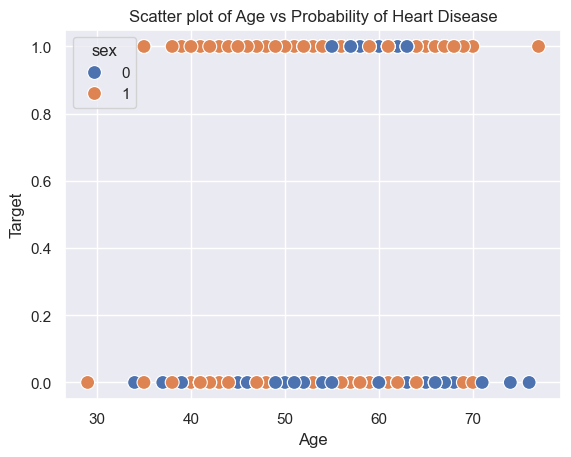

In [79]:
plt.figure()
sns.scatterplot(data=df, x='age', y='target', hue='sex', s=100)

plt.title('Scatter plot of Age vs Probability of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Target')

Text(0, 0.5, 'Number of Samples')

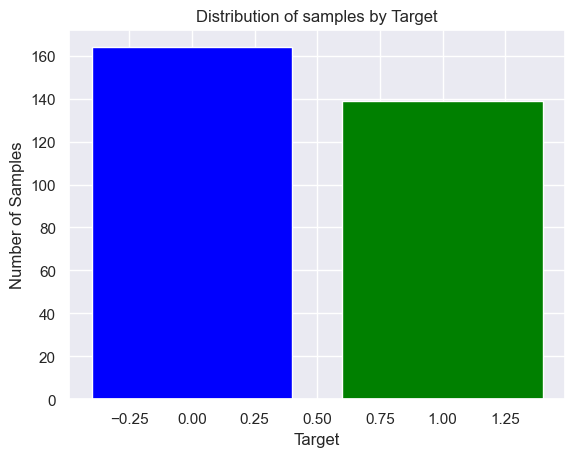

In [64]:
target_counts = df['target'].value_counts()
plt.figure()
plt.bar(target_counts.index, target_counts.values, color=['blue', 'green'])

plt.title('Distribution of samples by Target')
plt.xlabel('Target')
plt.ylabel('Number of Samples')

In [60]:
target_counts

target
0    164
1    139
Name: count, dtype: int64

# Plot the correlation between Age, Gender and Probability of Heart Disease

Text(0, 0.5, 'Target')

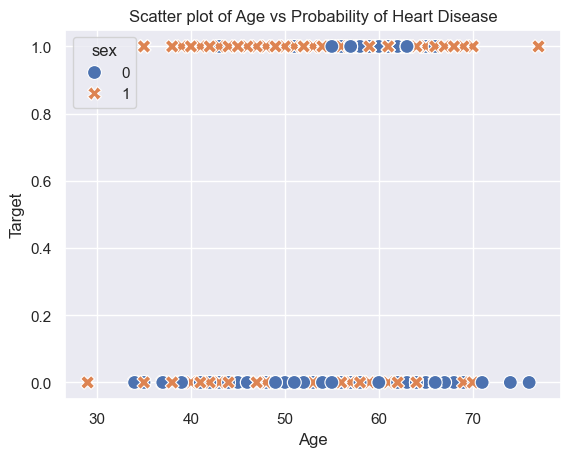

In [112]:
plt.figure()
sns.scatterplot(data=df, x='age', y='target', hue='sex', style='sex', s=100) # s=100: size of points

plt.title('Scatter plot of Age vs Probability of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Target')

Text(0, 0.5, 'age')

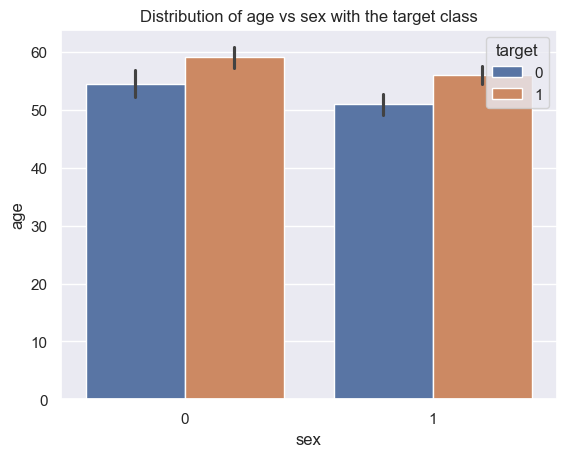

In [110]:
plt.figure()
sns.barplot(x='sex', y='age', hue='target', data=df)

plt.title('Distribution of age vs sex with the target class')
plt.xlabel('sex')
plt.ylabel('age')

# Use KNN for prediction

In [92]:
df.iloc[:, :-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0


In [94]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 68.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.74      0.62      0.68        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61

Confusion Matrix:
[[22  7]
 [12 20]]


In [122]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'train_accuracy: {train_accuracy}')
print(f'test_accuracy: {test_accuracy}')

train_accuracy: 0.756198347107438
test_accuracy: 0.6885245901639344


# Use SVM for prediction

In [127]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [129]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 66.12%
Test Accuracy: 67.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        29
           1       0.83      0.47      0.60        32

    accuracy                           0.67        61
   macro avg       0.72      0.68      0.66        61
weighted avg       0.72      0.67      0.66        61

Confusion Matrix:
[[26  3]
 [17 15]]


# Use Naive Bayes for prediction

In [139]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [141]:
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 84.71%
Test Accuracy: 83.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
[[26  3]
 [ 7 25]]


# Use Decision Tree for prediction

In [144]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=10, 
    min_samples_split=2, 
    random_state=42
)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [146]:
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.00%
Test Accuracy: 75.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Confusion Matrix:
[[22  7]
 [ 8 24]]


# Use Random Forest for prediction

In [151]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    criterion='gini', 
    max_depth=10, 
    min_samples_split=2, 
    n_estimators=10, 
    random_state=42
)

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [153]:
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 98.35%
Test Accuracy: 80.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
[[25  4]
 [ 8 24]]


# Use Adaboost

In [160]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(
    n_estimators=50, 
    learning_rate=1.0, 
    random_state=42
)

adaboost_model.fit(X_train, y_train)

C:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [164]:
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 91.32%
Test Accuracy: 83.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
[[26  3]
 [ 7 25]]


# Use Gradient Boost for prediction

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)

gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [169]:
y_train_pred = gradient_boosting_model.predict(X_train)
y_test_pred = gradient_boosting_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 99.59%
Test Accuracy: 85.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[25  4]
 [ 5 27]]


# Use XGBoost for prediction

In [175]:
!pip install xgboost

In [176]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    n_estimators=100
)

xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [177]:
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.00%
Test Accuracy: 86.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]


# Use Stacking for prediction

In [192]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(objective="binary:logistic", random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

base_models = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)

C:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Tha

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fa...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [194]:
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.00%
Test Accuracy: 88.52%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[27  2]
 [ 5 27]]
